In [2]:
import matplotlib.pyplot as plt
import numpy as np
from bisect import bisect_right
%matplotlib inline

### Taks1. Осуществить моделирование n = 1000 реализаций БСВ с помощью мультипликативного конгруэнтного метода (МКМ) с параметрами $a_0$, β, M = $2^{31}$

In [1]:
n = 1000

Sensor parameters (параметры датчика)

In [47]:
M = 2 ** 31
alpha0 = 16807
beta = 16807

### Multiplicative congruent method

Согласно этому методу псевдослучайная последовательность реализаций $\alpha_1,...,\alpha_n$ БСВ $\alpha$ определяется по реккурентным формулам: $$\alpha_t = \alpha_t^* / M$$ $$\alpha_t^* = \beta\alpha_{t-1}^*modM (t = 1,2,...),$$ где $\beta,M,\alpha_0^*$ - параметры датчика (натуральные числа) :  $\beta$ - множитель ($\beta<M$), M – модуль,  $\alpha_0^* \in \{1,...,M-1\}$ - стартовое значение (нечётное число).   

In [48]:
def mcm(previous_alpha, beta, M, n):
    for _ in range(n):
        alpha = (beta * previous_alpha) % M
        previous_alpha = alpha
        yield alpha / M

In [49]:
mcm_values = list(mcm(alpha0, beta, M, n))

#### Построим гистограмму выборки

### Task2. Осуществить моделирование n = 1000 реализаций БСВ с помощью метода Макларена-Марсальи (один датчик должен быть мультипликативно конгруентный (п. 1), второй – на выбор). K – объем вспомогательной таблицы

In [50]:
K = 64

In [51]:
mcm_values2 = list(mcm(alpha0, beta, M, n + K))

Text(0, 0.5, '$pdf$')

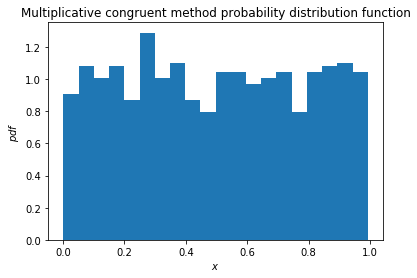

In [52]:
plt.hist(mcm_values2, bins = 20, density=True)

plt.title('Multiplicative congruent method probability distribution function')
plt.xlabel('$x$')
plt.ylabel('$pdf$')

Создадим 2ой массив СВ

In [53]:
uniform_values = list(np.random.rand(1000)) #uniform distribution over [0, 1).

Text(0, 0.5, '$pdf$')

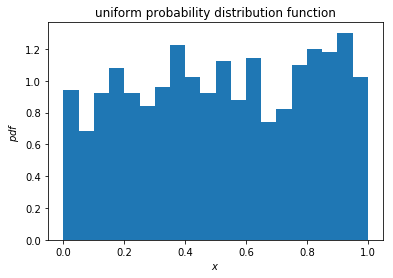

In [54]:
plt.hist(uniform_values, bins = 20, density=True)

plt.title('uniform probability distribution function')
plt.xlabel('$x$')
plt.ylabel('$pdf$')

### Maclaren Marsaglia method

Метод основан на комбинировании двух простейших программных датчиков БСВ (например, мультипликативных конгруэнтных).  
Пусть $\{\beta_t\}, \{c_t\}$ - псевдослучайные последовательности, порождаемые независимо работающими датчиками; $\{\alpha_t\}$ - результирующая псевдослучайная последовательность реализаций БСВ; V = {V(0),V(1),...,V(K-1)} вспомогательная таблица чисел.  
Процесс вычисления $\{\alpha_t\}$ включает следующие этапы:
* первоначальное заполнение таблицы V: $$V(i)=b_i, i=\overline{0,K-1};$$
* случайный выбор из таблицы: $$\alpha_t = V(s),$$ $$s=[c_t \cdot K];$$
* обновление табличных значений: $$V(s)=b_{t+K}, t=0,1,2,..$$

In [55]:
def mmm(list1, list2, K):
    v = list1[:K]
    
    for i in range(n):
        s = int(list2[i] * K)
        yield v[s]
        v[s] = list1[i + K]

In [56]:
mmm_values = list(mmm(mcm_values2, uniform_values, K))

Text(0, 0.5, '$pdf$')

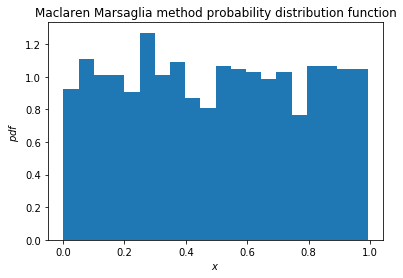

In [57]:
plt.hist(mmm_values, bins = 20, density=True)

plt.title('Maclaren Marsaglia method probability distribution function')
plt.xlabel('$x$')
plt.ylabel('$pdf$')

### Task3. Проверить точность моделирования обоих датчиков (п. 1 и п. 2) с помощью критерия согласия Колмогорова и χ2-критерия Пирсона с уровнем значимости ε = 0.05.

### Критерий согласия Колмогорова

Критерий Колмогорова-Смирнова используется для проверки гипотезы $H_0$: "случайная величина X имеет распределение F(x)".

Статистика, называемая расстоянием Колмогорова между $\hat{F_\xi}(\cdot)$ и $F_0(\cdot)$: $$D_n=sup_{x\in R^1}|\hat{F_\xi}(x)-F_0(x)|$$

delta https://helpstat.ru/raspredelenie-statistiki-kolmogorova/

In [58]:
delta = 1.358

In [59]:
def kolmogorov(random_values, delta):
        
    n = len(random_values)

    empirical = sorted(random_values)
    theoretical_cdf = [i / n for i in range(n)]
    
    kolmogorov_distance = 0
    for i, empirical_value in enumerate(empirical):
        kolmogorov_distance = max(kolmogorov_distance, abs(empirical_value - theoretical_cdf[i]))
       
    res = np.sqrt(n) * kolmogorov_distance
    return res < delta    

In [60]:
kolmogorov(mcm_values, delta)

True

In [61]:
kolmogorov(mmm_values, delta)

True

### Критерий χ2-критерия согласия Пирсона

Распределение $\chi^2$ (хи-квадрат) с n степенями свободы — это распределение суммы квадратов n независимых стандартных нормальных случайных величин. http://www.machinelearning.ru/wiki/index.php?title=%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82

Критерий Пирсона используется для проверки гипотезы $H_0$: "случайная величина X имеет распределение F(x)".

http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82

Статистика критерия хи-квадрат: $$\chi^2=\sum_{i=1}^K \frac{\left(n_i- np_i\right)^2}{np_i}$$

In [76]:
K = 10 #число ячеек гистограммы
delta_005_10 = 16.919

In [77]:
def count_frequencies(random_values, K):
    
    min_el = min(random_values)
    max_el = max(random_values)
    
    step = (max_el - min_el) / (K + 1)
    intervals_values = np.arange(min_el, max_el, step)
    
    frequencies = [0] * K
    
    sorted_random_values = sorted(random_values)
    
    last_position = 0
    for i in range(K):
        position = bisect_right(sorted_random_values, intervals_values[i + 1])
        frequencies[i] = position - last_position
        last_position = position
        
    return frequencies

In [78]:
def pearson(frequencies, p, n, K, delta):
    chi_2 = sum([(frequencies[i] - n * p) ** 2 / (n * p) for i in range(K)])
    print(chi_2)
    return chi_2 < delta

In [79]:
probability = 1 / K 

In [80]:
frequencies = count_frequencies(mcm_values, K)
frequencies

[93, 92, 91, 101, 86, 86, 90, 91, 84, 93]

In [81]:
pearson(frequencies, probability, n, K, delta_005_10)

10.73


True

In [82]:
mmm_frequencies = count_frequencies(mmm_values, K)
pearson(mmm_frequencies, probability, n, K, delta_005_10)

10.209999999999999


True